In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import random
from scipy.ndimage.interpolation import shift
def lorenz(x, y, z, s, r, b):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 998


def attractor(param=[10,28,2.667]):
	# Need one more for the initial values
	s, r, b = param
	xs = np.empty((stepCnt + 1,), dtype=np.float128)
	ys = np.empty((stepCnt + 1,), dtype=np.float128)
	zs = np.empty((stepCnt + 1,), dtype=np.float128)

	# Setting initial values
	xs[0], ys[0], zs[0] = (0., 1., 1.05)

	# Stepping through "time".
	for i in range(stepCnt):
	    # Derivatives of the X, Y, Z state
	    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s, r, b)
	    xs[i + 1] = xs[i] + (x_dot * dt) * random.randint(1,4)
	    ys[i + 1] = ys[i] + (y_dot * dt)
	    zs[i + 1] = zs[i] + (z_dot * dt)
	return xs, zs

In [9]:
def get_a_bunch_of_lorenz(s_range = [4,100],r_range = [20,120],b_range = [1, 25]):
    num_graphs = 256
    #[8,50] [45,56]  [4.5,6.62]
    #s_range = [4,100]
    #r_range = [20,120]
    #b_range = [1, 25]
    parameters = ['s', 'r', 'b']
    param_ranges = [s_range, r_range, b_range]
    count = 0	
    attractors = []
    
    for param_range in param_ranges:
        for index, param_val in zip(range(1 + count*num_graphs, (count+2)*num_graphs),np.linspace(param_range[0],param_range[1],num_graphs)):

            param_array = [10,28,2.667]
            param_array[count] = param_val
            #plt.subplot(3,num_graphs,index)

            #plt.title("%s=%.2f" % (parameters[count],param_val))
            #plt.axis('off')
            xs, ys = attractor(param_array)
            attractors.append(np.c_[xs,ys])
            #plt.plot(xs,ys)
        count += 1
    return attractors

In [10]:
percentage = 0.25

random_neg = [np.random.rand(999,2) for x in range(int(percentage*1026))]

In [11]:
attractors = np.asarray(get_a_bunch_of_lorenz())
k = np.argwhere(np.isnan(attractors))

/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in longdouble_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in longdouble_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in longdouble_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in longdouble_scalars
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longdouble_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/sam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invali

(548, 999, 2)


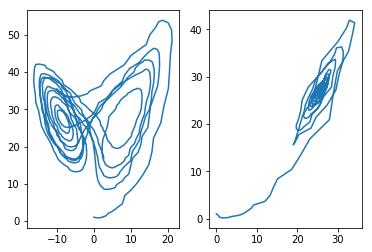

In [12]:
baby = np.delete(attractors, np.unique(k[:,0]), axis=0)
print(baby.shape)
plt.subplot(1,2,1)
plt.plot(baby[0][:,0], baby[0][:,1])
plt.subplot(1,2,2)
plt.plot(baby[539][:,0], baby[539][:,1])

In [13]:
neg_set = np.concatenate((attractors,random_neg),axis=0)
neg_set.shape

(1024, 999, 2)

In [14]:
np.random.RandomState(27)
np.random.shuffle(neg_set)

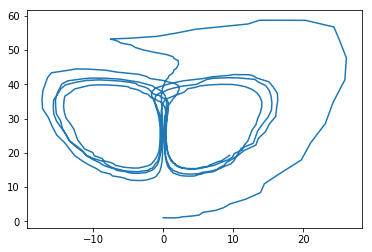

In [15]:
plt.plot(neg_set[0][:,0], neg_set[0][:,1])

In [16]:
shifted_arr = []
np.random.shuffle(attractors)
for attractor in attractors[:100]:
    shifted_arr.append(np.c_[attractor[:,0], np.roll(attractor[:,1], 4)])
shifted_arr

[array([[ 0.        , 19.19166781],
        [ 0.05882353, 20.33384117],
        [ 0.1683737 , 21.61988859],
        ...,
        [11.27824557, 16.78285072],
        [12.4389658 , 17.40788457],
        [12.96541708, 18.23314967]], dtype=float128),
 array([[ 0.        ,  3.94761214],
        [ 0.1       ,  4.01477498],
        [ 0.278     ,  4.16827862],
        ...,
        [-5.42567104,  4.25788729],
        [-6.54950854,  4.08775544],
        [-7.42093745,  3.97716695]], dtype=float128),
 array([[ 0.        , 29.03871475],
        [ 0.45035294, 29.07625408],
        [ 0.69338458, 29.06467094],
        ...,
        [ 8.75194635, 28.74145351],
        [ 8.74121698, 28.86354127],
        [ 8.65359209, 28.96725057]], dtype=float128),
 array([[ 0.        , 27.00000428],
        [ 0.4       , 27.00000386],
        [ 0.577     , 27.00000311],
        ...,
        [25.88276897, 27.00000317],
        [25.88276826, 27.00000392],
        [25.88276799, 27.0000043 ]], dtype=float128),
 array([[ 0.

In [17]:
np.asarray(shifted_arr).shape

(100, 999, 2)

In [19]:
final_X = np.concatenate((neg_set, shifted_arr), axis=0)

In [23]:

[np.savetxt("./Experiments/trajectory_v_math/train/neg_set/file_[%s].csv" % index, xs, delimiter=",") for index, xs in zip(range(final_X.shape[0]), final_X)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,